In [ ]:
# mount google drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls -al 'gdrive/My Drive/'

total 37910160
drwx------ 2 root root        4096 Apr  6 09:32  1s_dataset
drwx------ 2 root root        4096 May  2 01:35  aligned_baseline_dataset
-rw------- 1 root root   385844385 May  1 19:07  aligned_baseline_dataset.tar.gz
drwx------ 2 root root        4096 May  1 14:57  aligned_image_DB_subset10
-rw------- 1 root root   385471538 May  1 07:28  aligned_image_DB_subset10.tar.gz
drwx------ 2 root root        4096 Apr 30 05:54  aligned_images_DB
drwx------ 2 root root        4096 May  1 21:14  aligned_images_DB_dataset
-rw------- 1 root root  5426445149 May  1 20:19  aligned_images_DB_dataset.tar.gz
-rw------- 1 root root  5424518297 Apr 30 01:18  aligned_images_DB.tar.gz
drwx------ 2 root root        4096 Aug 20  2020 'Colab Notebooks'
drwx------ 2 root root        4096 Apr  6 08:14  dataForCNN
drwx------ 2 root root        4096 Apr  6 08:13  dataForCNN_temp_ban
drwx------ 2 root root        4096 May  1 19:14  DeepFace
drwx------ 2 root root        4096 Apr  6 09:10  Dustin-spectr

In [ ]:
import os, sys
import numpy
from shutil import copyfile

def mkdir(path):
  folder = os.path.exists(path)
  if not folder:
    os.makedirs(path)

In [ ]:
!rm -rf 'gdrive/My Drive/frame_image_DB_subset10/'

In [ ]:
mkdir('gdrive/My Drive/frame_image_DB_subset10/')

In [ ]:
!tar -xzvf 'gdrive/My Drive/frame_image_DB_subset10.tar.gz' -C 'gdrive/My Drive/frame_image_DB_subset10/'

Streaming output truncated to the last 5000 lines.
frame_image_DB_subset10/Adam_Scott/1/1.2755.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2756.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2757.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2758.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2759.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2760.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2761.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2762.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2763.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2764.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2765.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2766.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2767.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2768.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2769.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2770.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2771.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2772.jpg
frame_image_DB_subset10/Adam_Scott/1/1.2773.jpg
frame_image_DB_subset10/Adam_Scott/1/

In [ ]:
!rm -rf 'gdrive/My Drive/aligned_image_DB_subset10/'

In [ ]:
mkdir('gdrive/My Drive/aligned_image_DB_subset10/')

In [ ]:
!tar -xzvf 'gdrive/My Drive/aligned_image_DB_subset10.tar.gz' -C 'gdrive/My Drive/aligned_image_DB_subset10/'

In [ ]:
!mkdir 'gdrive/My Drive/aligned_images_DB'

In [ ]:
!ls gdrive/My\ Drive/aligned_images_DB/aligned_images_DB/ | wc -l 

In [ ]:
!tar -xzvf 'gdrive/My Drive/YouTubeFaces.tar.gz' -C 'gdrive/My Drive/YouTubeFaces/'

!tar -xzvf 'gdrive/My Drive/aligned_images_DB.tar.gz' -C 'gdrive/My Drive/aligned_images_DB/'

1595


In [ ]:
mkdir('gdrive/My Drive/frame_baseline_dataset/')

In [ ]:
#frame_baseline_dataset
path = 'gdrive/My Drive/frame_image_DB_subset10/frame_image_DB_subset10/'

target_dir = 'gdrive/My Drive/frame_baseline_dataset/'

root_dir = [x for x in sorted(os.listdir(path))]

max_size = 20

mkdir(target_dir + 'train/')
mkdir(target_dir + 'validation/')
mkdir(target_dir + 'test/')

for i in range(len(root_dir)):
  mkdir(target_dir + 'train/' + root_dir[i])
  mkdir(target_dir + 'validation/' + root_dir[i])
  mkdir(target_dir + 'test/' + root_dir[i])

  image_folder = [x for x in sorted(os.listdir(path + root_dir[i]))]  

  for j in range(len(image_folder)):

    image_list = [x for x in sorted(os.listdir(path + root_dir[i] + "/" + image_folder[j] + "/"))]
    
    image2copy = int(max_size/len(image_folder))
    print(i, ':\t', image2copy, int((len(image_list) - image2copy) * 0.8) + image2copy, len(image_list))

    #test_set
    for k in range(image2copy):
      copyfile(path + root_dir[i] + "/" + image_folder[j] + "/" + image_list[k], target_dir + "test/" + root_dir[i] + '/' + image_list[k])
    #train_set
    for k in range(image2copy, int((len(image_list) - image2copy) * 0.8) + image2copy):
      copyfile(path + root_dir[i] + "/" + image_folder[j] + "/" + image_list[k], target_dir + "train/" + root_dir[i] + '/' + image_list[k])
    #validation_set
    for k in range(int((len(image_list) - image2copy) * 0.8) + image2copy, len(image_list)):
      copyfile(path + root_dir[i] + "/" + image_folder[j] + "/" + image_list[k], target_dir + "validation/" + root_dir[i] + '/' + image_list[k])


0 :	 10 65 79
0 :	 10 157 194
1 :	 6 69 85
1 :	 6 40 49
1 :	 6 46 56
2 :	 20 109 132
3 :	 10 58 70
3 :	 10 141 174
4 :	 10 97 119
4 :	 10 68 83
5 :	 10 41 49
5 :	 10 191 237
6 :	 20 184 226
7 :	 6 83 103
7 :	 6 229 285
7 :	 6 114 141
8 :	 10 45 54
8 :	 10 42 50
9 :	 20 503 624
10 :	 20 250 308
11 :	 10 139 172
11 :	 10 158 195
12 :	 20 46 53
13 :	 20 89 107
14 :	 6 50 61
14 :	 6 47 58
14 :	 6 123 153
15 :	 10 226 281
15 :	 10 50 60
16 :	 6 84 104
16 :	 6 42 52
16 :	 6 144 179
17 :	 20 77 92
18 :	 20 54 63
19 :	 10 48 58
19 :	 10 48 58
20 :	 6 39 48
20 :	 6 50 62
20 :	 6 43 53
21 :	 20 194 238
22 :	 20 379 469
23 :	 20 229 282
24 :	 20 560 695
25 :	 20 100 120
26 :	 20 54 63
27 :	 5 48 59
27 :	 5 47 58
27 :	 5 57 71
27 :	 5 45 55
28 :	 20 46 53
29 :	 20 55 64
30 :	 10 140 173
30 :	 10 58 70
31 :	 20 46 53
32 :	 5 148 184
32 :	 5 57 71
32 :	 5 57 70
32 :	 5 42 52
33 :	 5 72 89
33 :	 5 41 51
33 :	 5 65 80
33 :	 5 48 59
34 :	 5 139 173
34 :	 5 97 120
34 :	 5 104 129
34 :	 5 116 144
35 :	 5

In [ ]:
!rm -rf 'gdrive/My Drive/aligned_image_DB_subset10/'

In [ ]:
!ls -al 'gdrive/My Drive/aligned_image_DB_subset10/aligned_image_DB_sub10/'

In [ ]:
mkdir('gdrive/My Drive/aligned_baseline_dataset/')

In [ ]:
#aligned_baseline_dataset
path = 'gdrive/My Drive/aligned_image_DB_subset10/aligned_image_DB_sub10/'

target_dir = 'gdrive/My Drive/aligned_baseline_dataset/'

root_dir = [x for x in sorted(os.listdir(path))]

max_size = 20

mkdir(target_dir + 'train/')
mkdir(target_dir + 'validation/')
mkdir(target_dir + 'test/')

for i in range(len(root_dir)):
  mkdir(target_dir + 'train/' + root_dir[i])
  mkdir(target_dir + 'validation/' + root_dir[i])
  mkdir(target_dir + 'test/' + root_dir[i])

  image_folder = [x for x in sorted(os.listdir(path + root_dir[i]))]  

  for j in range(len(image_folder)):

    image_list = [x for x in sorted(os.listdir(path + root_dir[i] + "/" + image_folder[j] + "/"))]
    
    image2copy = int(max_size/len(image_folder))
    print(i, ':\t', image2copy, int((len(image_list) - image2copy) * 0.8) + image2copy, len(image_list))

    #test_set
    for k in range(image2copy):
      copyfile(path + root_dir[i] + "/" + image_folder[j] + "/" + image_list[k], target_dir + "test/" + root_dir[i] + '/' + image_list[k])
    #train_set
    for k in range(image2copy, int((len(image_list) - image2copy) * 0.8) + image2copy):
      copyfile(path + root_dir[i] + "/" + image_folder[j] + "/" + image_list[k], target_dir + "train/" + root_dir[i] + '/' + image_list[k])
    #validation_set
    for k in range(int((len(image_list) - image2copy) * 0.8) + image2copy, len(image_list)):
      copyfile(path + root_dir[i] + "/" + image_folder[j] + "/" + image_list[k], target_dir + "validation/" + root_dir[i] + '/' + image_list[k])


In [ ]:
!rm -rf 'gdrive/My Drive/aligned_baseline_dataset/'

In [ ]:
!tar -xzvf 'gdrive/My Drive/aligned_baseline_dataset.tar.gz' -C 'gdrive/My Drive/'

Streaming output truncated to the last 5000 lines.
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1618.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1619.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1620.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1621.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1622.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1623.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1624.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1625.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1626.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1627.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1628.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1629.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1630.jpg
aligned_baseline_dataset/train/Abdullah/aligned_detect_1.1631.jpg
aligned_baseline_dataset/

Finalized InceptionResNetV2 Model on entire Aligned_Image_DB


In [ ]:
!rm -rf 'gdrive/My Drive/aligned_images_DB_dataset/'

In [ ]:
!tar -xzvf 'gdrive/My Drive/aligned_images_DB_dataset.tar.gz' -C 'gdrive/My Drive/'

Streaming output truncated to the last 5000 lines.
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.394.jpg
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.395.jpg
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.396.jpg
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.397.jpg
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.398.jpg
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.399.jpg
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.400.jpg
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.401.jpg
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.402.jpg
aligned_images_DB_dataset/test/Carmen_Electra/aligned_detect_3.403.jpg
aligned_images_DB_dataset/test/Carl_Levin/aligned_detect_1.184.jpg
aligned_images_DB_dataset/test/Carl_Levin/aligned_detect_1.185.jpg
aligned_images_DB_dataset/test/Carl_Levin/aligned_detect_1.186.jpg
aligned_images_DB_dataset/test/Carl_Le

In [5]:
%%time

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'D:\\aligned_images_DB_dataset\\train'
validation_dir = 'D:\\aligned_images_DB_dataset\\validation'
test_dir = 'D:\\aligned_images_DB_dataset\\test'

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size=(152, 152),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    directory = validation_dir,    
    target_size=(152, 152),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

test_generator = test_datagen.flow_from_directory(        
    directory = test_dir,    
    target_size=(152, 152),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

Found 470543 images belonging to 1595 classes.
Found 119313 images belonging to 1595 classes.
Found 31270 images belonging to 1595 classes.
Wall time: 16.8 s


In [6]:
%%time

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.applications import InceptionResNetV2

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(152, 152, 3))
conv_base.trainable = False
#conv_base.summary()
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block3_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

InceptionResNetV2_aligned_model = keras.Sequential()
InceptionResNetV2_aligned_model.add(conv_base)

InceptionResNetV2_aligned_model.add(layers.Flatten())
InceptionResNetV2_aligned_model.add(layers.Dense(4096, activation='relu'))
InceptionResNetV2_aligned_model.add(layers.Dense(1595, activation='softmax'))

InceptionResNetV2_aligned_model.compile(loss = 'categorical_crossentropy', 
                optimizer = keras.optimizers.Adam(learning_rate=2e-5), 
                metrics = ['accuracy'])

InceptionResNetV2_aligned_history = InceptionResNetV2_aligned_model.fit(train_generator, 
                    steps_per_epoch = 20, 
                    epochs = 100, 
                    validation_data=validation_generator)

Epoch 1/100
20/20 [==============================] - 3161s 166s/step - loss: 7.7529 - accuracy: 0.0547 - val_loss: 7.4034 - val_accuracy: 0.0745
Epoch 2/100
20/20 [==============================] - 364s 19s/step - loss: 6.9213 - accuracy: 0.1125 - val_loss: 6.5927 - val_accuracy: 0.1457
Epoch 3/100
20/20 [==============================] - 359s 19s/step - loss: 6.3202 - accuracy: 0.1703 - val_loss: 6.0434 - val_accuracy: 0.2086
Epoch 4/100
20/20 [==============================] - 357s 19s/step - loss: 5.7371 - accuracy: 0.2250 - val_loss: 5.6690 - val_accuracy: 0.2475
Epoch 5/100
20/20 [==============================] - 357s 19s/step - loss: 5.1832 - accuracy: 0.3078 - val_loss: 5.3364 - val_accuracy: 0.2849
Epoch 6/100
20/20 [==============================] - 358s 19s/step - loss: 5.1280 - accuracy: 0.3172 - val_loss: 5.0706 - val_accuracy: 0.3218
Epoch 7/100
20/20 [==============================] - 356s 19s/step - loss: 4.8724 - accuracy: 0.3438 - val_loss: 4.8448 - val_accuracy: 0.35

Epoch 58/100
20/20 [==============================] - 340s 18s/step - loss: 1.0103 - accuracy: 0.8547 - val_loss: 1.2819 - val_accuracy: 0.7892
Epoch 59/100
20/20 [==============================] - 356s 19s/step - loss: 0.9599 - accuracy: 0.8469 - val_loss: 1.2640 - val_accuracy: 0.7858
Epoch 60/100
20/20 [==============================] - 356s 19s/step - loss: 0.8724 - accuracy: 0.8516 - val_loss: 1.2308 - val_accuracy: 0.7981
Epoch 61/100
20/20 [==============================] - 347s 18s/step - loss: 0.8597 - accuracy: 0.8547 - val_loss: 1.2142 - val_accuracy: 0.7995
Epoch 62/100
20/20 [==============================] - 340s 18s/step - loss: 0.7921 - accuracy: 0.8750 - val_loss: 1.2272 - val_accuracy: 0.7968
Epoch 63/100
20/20 [==============================] - 344s 18s/step - loss: 0.8810 - accuracy: 0.8531 - val_loss: 1.1850 - val_accuracy: 0.8029
Epoch 64/100
20/20 [==============================] - 350s 18s/step - loss: 0.9761 - accuracy: 0.8453 - val_loss: 1.1442 - val_accuracy:

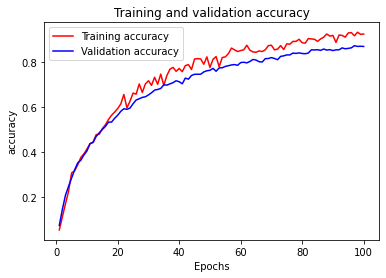

In [7]:
printplt(InceptionResNetV2_aligned_history)

In [8]:
%%time

InceptionResNetV2_aligned_model.evaluate(test_generator)

978/978 [==============================] - 942s 964ms/step - loss: 1.9296 - accuracy: 0.6789
Wall time: 15min 43s


[1.929608702659607, 0.678893506526947]

In [ ]:
InceptionResNetV2_aligned_model.save('gdrive/My Drive/saved_model/model_VGG16_aligend_YTF.h5')

In [ ]:
from keras.models import load_model

model = load_model('gdrive/My Drive/saved_model/model_frameYTFsub10.h5')

model.summary()